
# Import Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Datasets

In [2]:
df_train = pd.read_csv("Training Data.csv")
df_test = pd.read_csv("Test Data.csv")

# Check how train dataset looks like.

In [3]:
df_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Convert datatype of selected fields.

In [4]:
df_train = df_train.drop('Id',axis=1)
df_test = df_test.drop('id',axis=1)

In [5]:
#"married" feature into dummy
subgrade_dummies = pd.get_dummies(df_train['married'],drop_first=True)
df_train = pd.concat([df_train.drop('married',axis=1),subgrade_dummies],axis=1)

#"house_ownership" feature into dummy
dummy = pd.get_dummies(df_train['house_ownership'],drop_first=True)
df_train = pd.concat([df_train.drop('house_ownership',axis=1),dummy],axis=1)

#"car_ownership" feature into dummy
dummy = pd.get_dummies(df_train['car_ownership'],drop_first=True)
df_train = pd.concat([df_train.drop('car_ownership',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_train['profession'],drop_first=True)
df_train = pd.concat([df_train.drop('profession',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_train['state'],drop_first=True)
df_train = pd.concat([df_train.drop('state',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_train['city'],drop_first=True)
df_train = pd.concat([df_train.drop('city',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_train['age'],drop_first=True)
df_train = pd.concat([df_train.drop('age',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_train['experience'],drop_first=True)
df_train = pd.concat([df_train.drop('experience',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_train['current_job_years'],drop_first=True)
df_train = pd.concat([df_train.drop('current_job_years',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_train['current_house_years'],drop_first=True)
df_train = pd.concat([df_train.drop('current_house_years',axis=1),dummy],axis=1)

#feature scaling 
from sklearn.preprocessing import MinMaxScaler

dfr = df_train['income']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)

scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_train['income'] = dfr

In [6]:
#"married" feature into dummy
subgrade_dummies = pd.get_dummies(df_test['married'],drop_first=True)
df_test = pd.concat([df_test.drop('married',axis=1),subgrade_dummies],axis=1)

#"house_ownership" feature into dummy
dummy = pd.get_dummies(df_test['house_ownership'],drop_first=True)
df_test = pd.concat([df_test.drop('house_ownership',axis=1),dummy],axis=1)

#"car_ownership" feature into dummy
dummy = pd.get_dummies(df_test['car_ownership'],drop_first=True)
df_test = pd.concat([df_test.drop('car_ownership',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_test['profession'],drop_first=True)
df_test = pd.concat([df_test.drop('profession',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_test['state'],drop_first=True)
df_test = pd.concat([df_test.drop('state',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_test['city'],drop_first=True)
df_test = pd.concat([df_test.drop('city',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_test['age'],drop_first=True)
df_test = pd.concat([df_test.drop('age',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_test['experience'],drop_first=True)
df_test = pd.concat([df_test.drop('experience',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_test['current_job_years'],drop_first=True)
df_test = pd.concat([df_test.drop('current_job_years',axis=1),dummy],axis=1)

#"profession" feature into dummy
dummy = pd.get_dummies(df_test['current_house_years'],drop_first=True)
df_test = pd.concat([df_test.drop('current_house_years',axis=1),dummy],axis=1)

#feature scaling 
from sklearn.preprocessing import MinMaxScaler

dfr = df_test['income']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)

scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_test['income'] = dfr

# Drop the dependent variable from the train/test dataset. 

In [7]:
from sklearn.model_selection import train_test_split

X = df_train.drop('risk_flag',axis=1)
y = df_train['risk_flag']

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=101)

# Train your model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [11]:
model = Sequential()

model.add(Dense(495,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(124,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(3,activation='relu'))
#model.add(Dropout(0.2))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_cv,y_cv),callbacks=[earlystop],verbose=1)

Epoch 1/600
5513/5513 [==============================] - 37s 7ms/step - loss: 0.3812 - accuracy: 0.8769 - val_loss: 0.2560 - val_accuracy: 0.8769
Epoch 2/600
5513/5513 [==============================] - 35s 6ms/step - loss: 0.2638 - accuracy: 0.8773 - val_loss: 0.2361 - val_accuracy: 0.8769
Epoch 3/600
5513/5513 [==============================] - 35s 6ms/step - loss: 0.2311 - accuracy: 0.8773 - val_loss: 0.2352 - val_accuracy: 0.8769
Epoch 4/600
5513/5513 [==============================] - 34s 6ms/step - loss: 0.2141 - accuracy: 0.8771 - val_loss: 0.2341 - val_accuracy: 0.8769
Epoch 5/600
5513/5513 [==============================] - 34s 6ms/step - loss: 0.2111 - accuracy: 0.8772 - val_loss: 0.2521 - val_accuracy: 0.8769
Epoch 6/600
5513/5513 [==============================] - 34s 6ms/step - loss: 0.2077 - accuracy: 0.8780 - val_loss: 0.2472 - val_accuracy: 0.8769
Epoch 7/600
5513/5513 [==============================] - 34s 6ms/step - loss: 0.2076 - accuracy: 0.8772 - val_loss: 0.2381 -

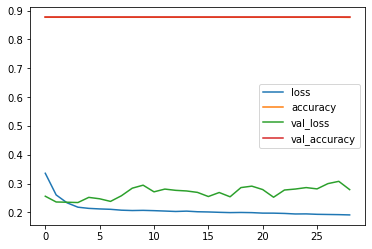

In [13]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

# Test your model 

In [43]:
val_loss,val_acc = model.evaluate(X_cv,y_cv)
print(val_loss)
print(val_acc)

2363/2363 [==============================] - 6s 2ms/step - loss: 0.2790 - accuracy: 0.8769
0.2789996862411499
0.8768783211708069


In [15]:
pred = np.argmax(model.predict(X_cv),-1)

# Check your roc_auc_score 

In [44]:
THRESHOLD = 0.05
pred = np.where(model.predict_proba(X_cv) > THRESHOLD, 1, 0)

from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report

print(roc_auc_score(y_cv,pred))
print()
print(accuracy_score(y_cv,pred))
print()
print(confusion_matrix(y_cv,pred))
print()
print(classification_report(y_cv,pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.8639547510122487

0.8525925925925926

[[56274 10018]
 [ 1126  8182]]

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     66292
           1       0.45      0.88      0.59      9308

    accuracy                           0.85     75600
   macro avg       0.71      0.86      0.75     75600
weighted avg       0.92      0.85      0.87     75600



In [47]:
THRESHOLD = 0.05
pred = np.where(model.predict_proba(df_test) > THRESHOLD, 1, 0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [48]:
pred = pd.DataFrame(pred)
index = pd.DataFrame(range(1,28001))
index = pd.concat([index,pred],axis=1)
index.columns = ['id','risk_flag']
index.set_index('id',inplace=True)
index.to_csv('result_6.csv')

In [49]:
index

,risk_flag
id,
1,0
2,0
3,0
4,1
5,0
...,...
27996,0
27997,0
27998,0
